![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Neural Style Transfer with OpenCV**

####**In this lesson we'll learn how to use pre-trained Models to implement Neural Style Transfer in OpenCV**

![](https://forums.fast.ai/uploads/default/original/3X/c/f/cf5bc18c3b8a3761e341056c3f131012001d4248.jpeg)

**About Neural Style Transfers**

Introduced by Leon Gatys et al. in 2015, in their paper titled “[A Neural Algorithm for Artistic Style](https://arxiv.org/abs/1508.06576)”, the Neural Style Transfer algorithm went viral resulting in an explosion of further work and mobile apps.

Neural Style Transfer enables the artistic style of an image to be applied to another image! It copies the color patterns, combinations, and brush strokes of the original source image and applies it to your input image. And is one the most impressive implementations of Neural Networks in my opinion.

For more: https://pyimagesearch.com/2018/08/27/neural-style-transfer-with-opencv/

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/NST.png)

In [2]:
#import the necessary packages
import numpy as np
import time
import cv2
import os
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt 

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Implement Neural Style Transfer using pretrained Models**

We use pretrained t7 PyTorch models that can be imported using ``cv2.dnn.readNetFromTouch()```

These models we're using come from the paper *Perceptual Losses for Real-Time Style Transfer and Super-Resolution* by Johnson et al. 

They improved proposing a Neural Style Transfer algorithm that performed 3 times faster by using a super-resolution-like problem based on perceptual loss function.

In [3]:
import imutils 
import cv2
import numpy as np
from os.path import isfile, join
import os 


In [6]:
# Load our t7 neural transfer models
model_file_path = "Datasets/NeuralStyleTransfer/models/"
model_file_paths = [f for f in os.listdir(model_file_path) if isfile(join(model_file_path, f))]


0 - candy model is being applied...
[INFO] neural style transfer took 0.5898 seconds


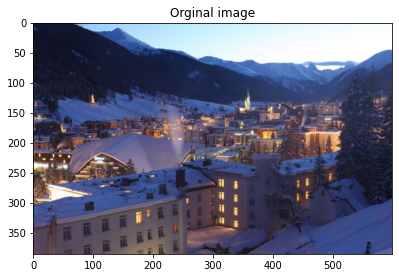

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


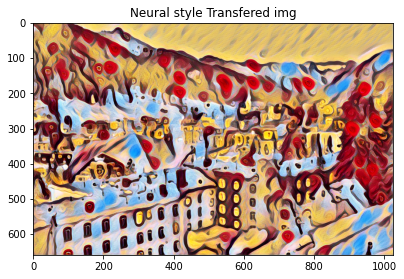

1 - composition_vii model is being applied...
[INFO] neural style transfer took 1.4524 seconds


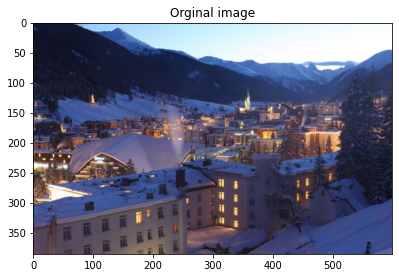

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


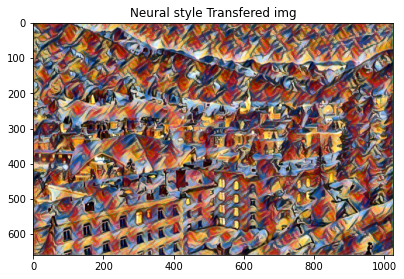

2 - feathers model is being applied...
[INFO] neural style transfer took 0.6233 seconds


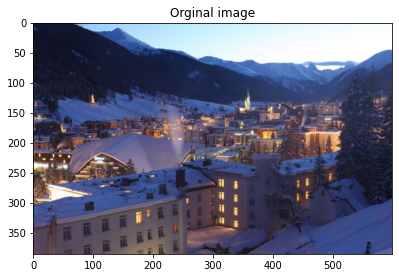

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


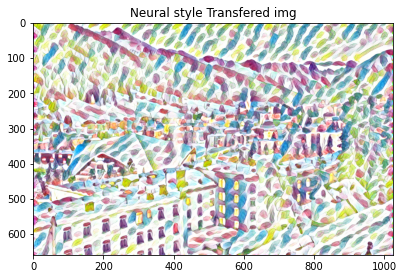

3 - la_muse model is being applied...
[INFO] neural style transfer took 0.6434 seconds


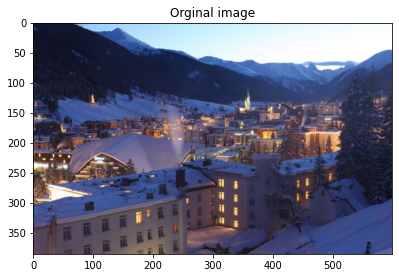

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


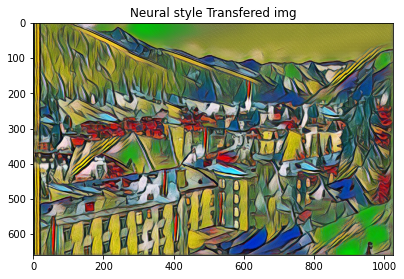

4 - mosaic model is being applied...
[INFO] neural style transfer took 0.6349 seconds


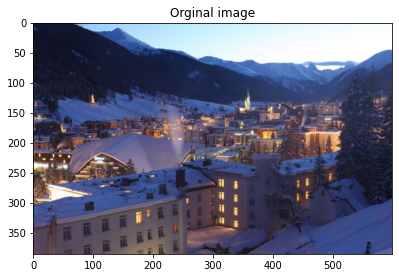

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


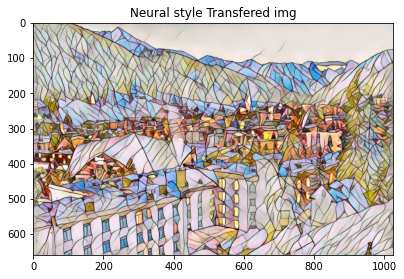

5 - starry_night model is being applied...
[INFO] neural style transfer took 1.2671 seconds


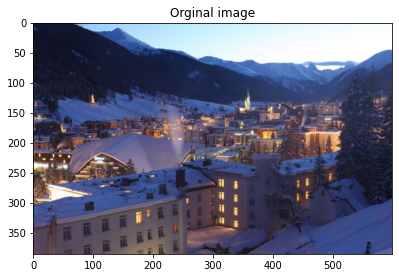

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


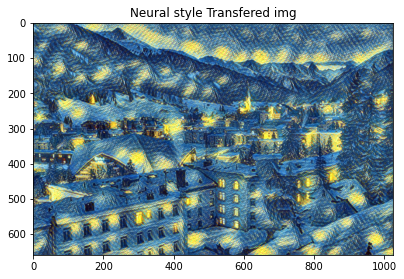

6 - the_scream model is being applied...
[INFO] neural style transfer took 0.6035 seconds


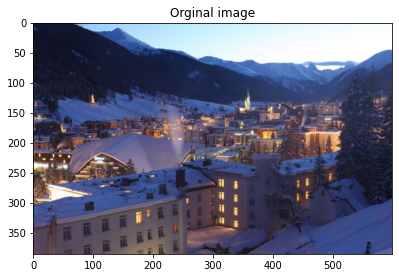

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


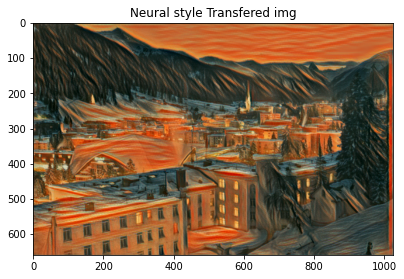

7 - the_wave model is being applied...
[INFO] neural style transfer took 1.2843 seconds


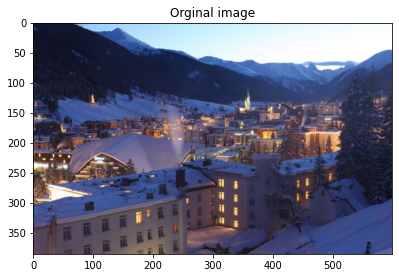

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


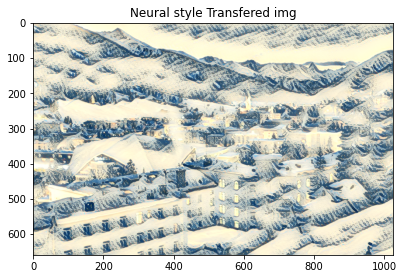

8 - udnie model is being applied...
[INFO] neural style transfer took 0.6171 seconds


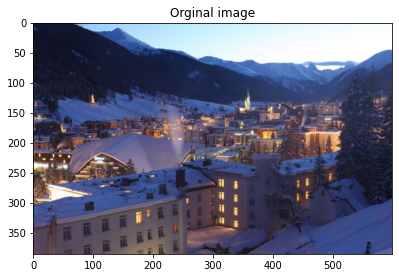

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


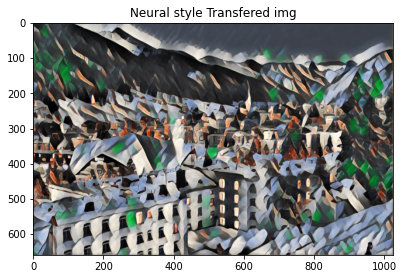

In [21]:
# Load our test image
image = cv2.imread("Datasets/images/city.jpg")

for (i,model) in enumerate(model_file_paths):
    print(f"{i} - {str(model)[:-3]} model is being applied...") 
    model_path  = model_file_path + model
    
    # loading our neural style transfer model 
    neural_model = cv2.dnn.readNetFromTorch(model_path)
    
    # Let's resize to a fixed height of 640 (feel free to change)
    h, w = int(img.shape[0]), int(img.shape[1])
    image = imutils.resize(image, width=600) 
    
    # blob rasm yasaymiz. Yanikim rasmni batch size formatga va first channel orderingga 
    #o'tkazish. Mn: (500,500,3) -> (1,3, 500,500)

    blob = cv2.dnn.blobFromImage(image, 1.0, (w, h), (103.939, 116.779, 123.680), swapRB=False, crop=False)
    neural_model.setInput(blob)     # forward to input
    
    #model training 
    start = time.time()
    output = neural_model.forward()
    end = time.time()
    
    # tensorni reshape qilib oz holiga qaytarib, mean subtractionni qoshamiz 
    # va last channel orderinga qaytaramiz
    output = output.reshape((3, output.shape[2], output.shape[3]))
    output[0] += 103.939
    output[1] += 116.779
    output[2] += 123.680
    output /= 255.0
    #transpose funksiyasi shape larni ornini almashtiradi
    output = output.transpose(1, 2, 0)

    # show information on how long inference took
    print("[INFO] neural style transfer took {:.4f} seconds".format(end - start))
    
    #print result 
    imshow('Orginal image', image)
    imshow('Neural style Transfered img', output)

# 2 . Real-time neural style transfer

In [38]:
video =  cv2.VideoCapture(0)
# Load our t7 neural transfer models
model_file_path = "Datasets/NeuralStyleTransfer/models/"
model_file_paths = [f for f in os.listdir(model_file_path) if isfile(join(model_file_path, f))]
random = np.random.choice(model_file_paths)
random_model = model_file_path + random 
print(random_model)

while video.isOpened(): 
    ret, frame = video.read()
    
      
    # loading our neural style transfer model 
    style_model = cv2.dnn.readNetFromTorch(random_model)
    
    # Let's resize to a fixed height of 640 (feel free to change)
    h, w = int(frame.shape[0]), int(frame.shape[1])
    rasm = imutils.resize(frame, width=600) 
    
    # blob rasm yasaymiz. Yanikim rasmni batch size formatga va first channel orderingga 
    #o'tkazish. Mn: (500,500,3) -> (1,3, 500,500)
    blob2 = cv2.dnn.blobFromImage(rasm, 1.0, (w, h), (103.939, 116.779, 123.680), swapRB=False, crop=False)
    # forward to input
    style_model.setInput(blob2)     
    #model training 
    result = style_model.forward()
    
    # tensorni reshape qilib oz holiga qaytarib, mean subtractionni qoshamiz 
    # va last channel orderinga qaytaramiz
    result = result.reshape((3, result.shape[2], result.shape[3]))
    result[0] += 103.939
    result[1] += 116.779
    result[2] += 123.680
    result /= 255.0
    #transpose funksiyasi shape larni ornini almashtiradi
    result = result.transpose(1, 2, 0)
    
    cv2.imshow('Orginal frame', frame)
    cv2.imshow(f'{random_model} is being applied', result)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break 

video.release()
cv2.destroyAllWindows()
    
    

Datasets/NeuralStyleTransfer/models/candy.t7
